In [11]:
import pandas as pd
gold_file = 'Gold.csv'
data  = pd.read_csv(gold_file)
data.head()

,DATE,VALUE
0,1995-01-03,381.40
1,1995-01-04,378.25
2,1995-01-05,375.00
3,1995-01-06,375.90
4,1995-01-09,372.45


In [22]:
# Checking for null values
data.isnull().sum()


VALUE    0
dtype: int64

In [13]:
# Checking the datatype and channging it to datetime so we can perform time related operations  
data.dtypes

DATE      object
VALUE    float64
dtype: object

In [14]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.head()

,DATE,VALUE
0,1995-01-03,381.40
1,1995-01-04,378.25
2,1995-01-05,375.00
3,1995-01-06,375.90
4,1995-01-09,372.45


In [15]:
data.dtypes

DATE     datetime64[ns]
VALUE           float64
dtype: object

In [17]:
data['DATE'].dt.year.head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: DATE, dtype: int64

In [21]:
data = data.set_index('DATE')
data

,VALUE
DATE,
1995-01-03,381.40
1995-01-04,378.25
1995-01-05,375.00
1995-01-06,375.90
1995-01-09,372.45
...,...
2016-11-04,1301.70
2016-11-07,1286.80
2016-11-08,1284.00


Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


<AxesSubplot:xlabel='DATE'>

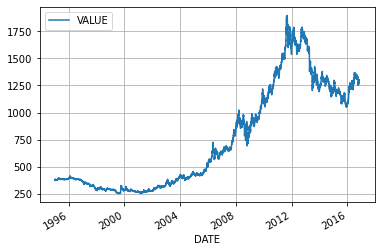

In [19]:
!matplotlib inline
data.plot(grid='on')

 ## Time Series Decomposition
 ### Additive model
 Y(t) = Trend(t) + Seasonality(t) + Residual(t)

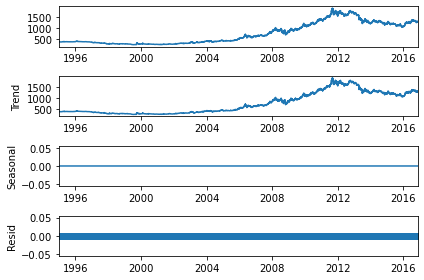

In [25]:
# We want to see the seasonal trend of the data
import statsmodels.api as sm

# I will add a period coz exceptions are raised without it
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=1)
fig = decomposition.plot()


In [26]:
# From above we see that our data is not seasonal

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0] # increase the plot size

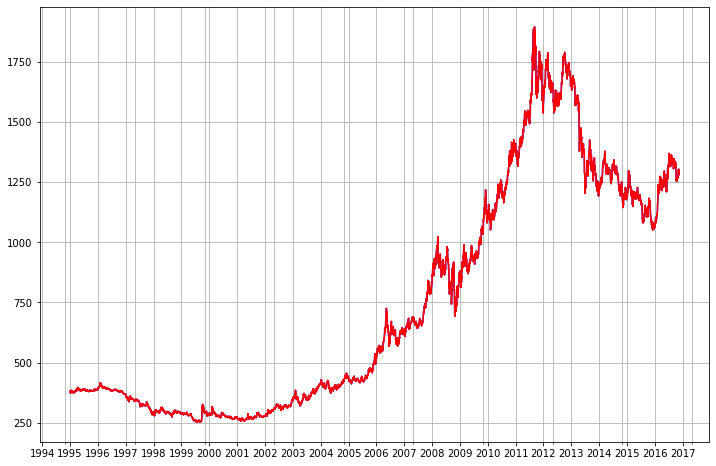

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fir, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=30)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')


ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(data.index, data['VALUE'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='r')